In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [2]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-10-16-20-37_Contrast_/"

In [3]:
masterdata = pd.read_csv(path_to_results + "Contrast.csv")

In [4]:
masterdata.head()

,refId,testId,ncols,nrows,alpha,beta,M,prepCPUtime,prepWalltime,runCPUtime,runWalltime,contrast,rep
0,independent-i-2-0.0-gaussian-1,CSPn,2,1000,0.5,0.5,1,40.486883,80.119708,38.635946,105.599795,0.000000,1
1,independent-i-2-0.0-gaussian-1,CSP,2,1000,0.5,0.5,1,28.298407,60.149188,56.044242,125.597165,0.000000,1
2,independent-i-2-0.0-gaussian-0,KSPs,2,1000,0.5,0.5,1,150.607420,206.363453,14.117766,27.718008,0.222826,1
3,independentcat-ic-2-0.0-gaussian-1,MWP,2,1000,0.5,0.5,1,133.307023,151.953383,17.374351,24.467124,0.000000,1
4,independent-i-2-0.0-gaussian-2,MWP,2,1000,0.5,0.5,1,170.081026,213.025533,3.722000,5.064505,0.341923,1


In [5]:
# simplify the refIds
extract = [x.split("-")[1:4] + [x.split("-")[5]] for x in masterdata["refId"]]
extract = [["ic"]+x[1::] if(x[0]=="independentcat") else x for x in extract]
extract = [["lc"]+x[1::] if(x[0]=="linearcat") else x for x in extract]
masterdata["refId"] = ["-".join(x) for x in extract]

In [6]:
refIds_shortlist = [
    'i-2-0.0-0', 'i-2-0.0-20', 'i-2-0.0-10', 'i-2-0.0-5', 'i-2-0.0-3',  'i-2-0.0-2',  'i-2-0.0-1',  
    'l-2-0.4-0', 'l-2-0.4-20', 'l-2-0.4-10', 'l-2-0.4-5',  'l-2-0.4-3', 'l-2-0.4-2', 'l-2-0.4-1',         
]

In [7]:
masterdata["testId"].unique()

array(['CSPn', 'CSP', 'KSPs', 'MWP', 'MWPn', 'KSPsn', 'MWPu', 'KSP', 'KSPn'], dtype=object)

In [8]:
tests_shortlist = ['MWP', 'MWPn', 'MWPu', 'KSP', 'KSPn', 'KSPs', 'KSPsn', 'CSP', 'CSPn']

In [9]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [10]:
prettynames = {
    "MWP": "MWP",
    "KSP" : "KSP",
    "KSPs" : "KSPs",
    "KSPsn" : "KSPsn",
    "CSP" : "CSP",
    "MWPn": "MWPn",
    "KSPn" : "KSP",
    "CSPn" : "CSP",
    'i-2-0.0-0' : "I",
    'i-2-0.0-20' : "I$_{20}$",
    'i-2-0.0-10' : "I$_{10}$",
    'i-2-0.0-5' : "I$_{5}$",
    'i-2-0.0-2' : "I$_{2}$",
    'i-2-0.0-1' : "I$_{1}$",
    
    'l-2-0.0-0' : "L",
    'l-2-0.0-20' : "L$_{20}$",
    'l-2-0.0-10' : "L$_{10}$",
    'l-2-0.0-5' : "L$_{5}$",
    'l-2-0.0-2' : "L$_{2}$",
    'l-2-0.0-1' : "L$_{1}$",
    
    'l-2-0.1-0' : "L",
    'l-2-0.1-20' : "L$_{20}$",
    'l-2-0.1-10' : "L$_{10}$",
    'l-2-0.1-5' : "L$_{5}$",
    'l-2-0.1-2' : "L$_{2}$",
    'l-2-0.1-1' : "L$_{1}$",
    
    'l-2-0.2-0' : "L",
    'l-2-0.2-20' : "L$_{20}$",
    'l-2-0.2-10' : "L$_{10}$",
    'l-2-0.2-5' : "L$_{5}$",
    'l-2-0.2-2' : "L$_{2}$",
    'l-2-0.2-1' : "L$_{1}$",
    
    'l-2-0.3-0' : "L",
    'l-2-0.3-20' : "L$_{20}$",
    'l-2-0.3-10' : "L$_{10}$",
    'l-2-0.3-5' : "L$_{5}$",
    'l-2-0.3-2' : "L$_{2}$",
    'l-2-0.3-1' : "L$_{1}$",
    
    'l-2-0.4-0' : "L",
    'l-2-0.4-20' : "L$_{20}$",
    'l-2-0.4-10' : "L$_{10}$",
    'l-2-0.4-5' : "L$_{5}$",
    'l-2-0.4-2' : "L$_{2}$",
    'l-2-0.4-1' : "L$_{1}$",
    
    'l-2-0.6-0' : "L",
    'l-2-0.6-20' : "L$_{20}$",
    'l-2-0.6-10' : "L$_{10}$",
    'l-2-0.6-5' : "L$_{5}$",
    'l-2-0.6-2' : "L$_{2}$",
    'l-2-0.6-1' : "L$_{1}$",
    
    'lc-2-0.5-20' : "L$^*_{20}$",
    'lc-2-0.5-10' : "L$^*_{10}$",
    'lc-2-0.5-5' : "L$^*_{5}$",
    'lc-2-0.5-2' : "L$^*_{2}$",
    'lc-2-0.5-1' : "L$^*_{1}$",
    
    'lc-2-0.6-20' : "L$^*_{20}$",
    'lc-2-0.6-10' : "L$^*_{10}$",
    'lc-2-0.6-5' : "L$^*_{5}$",
    'lc-2-0.6-2' : "L$^*_{2}$",
    'lc-2-0.6-1' : "L$^*_{1}$",
    
    'lc-2-0.4-20' : "L$^*_{20}$",
    'lc-2-0.4-10' : "L$^*_{10}$",
    'lc-2-0.4-5' : "L$^*_{5}$",
    'lc-2-0.4-2' : "L$^*_{2}$",
    'lc-2-0.4-1' : "L$^*_{1}$",
    
    'lc-2-0.3-20' : "L$^*_{20}$",
    'lc-2-0.3-10' : "L$^*_{10}$",
    'lc-2-0.3-5' : "L$^*_{5}$",
    'lc-2-0.3-2' : "L$^*_{2}$",
    'lc-2-0.3-1' : "L$^*_{1}$",
    
    'lc-2-0.2-20' : "L$^*_{20}$",
    'lc-2-0.2-10' : "L$^*_{10}$",
    'lc-2-0.2-5' : "L$^*_{5}$",
    'lc-2-0.2-2' : "L$^*_{2}$",
    'lc-2-0.2-1' : "L$^*_{1}$",
    
    'lc-2-0.0-20' : "L$^*_{20}$",
    'lc-2-0.0-10' : "L$^*_{10}$",
    'lc-2-0.0-5' : "L$^*_{5}$",
    'lc-2-0.0-2' : "L$^*_{2}$",
    'lc-2-0.0-1' : "L$^*_{1}$",
}

<IPython.core.display.Javascript object>


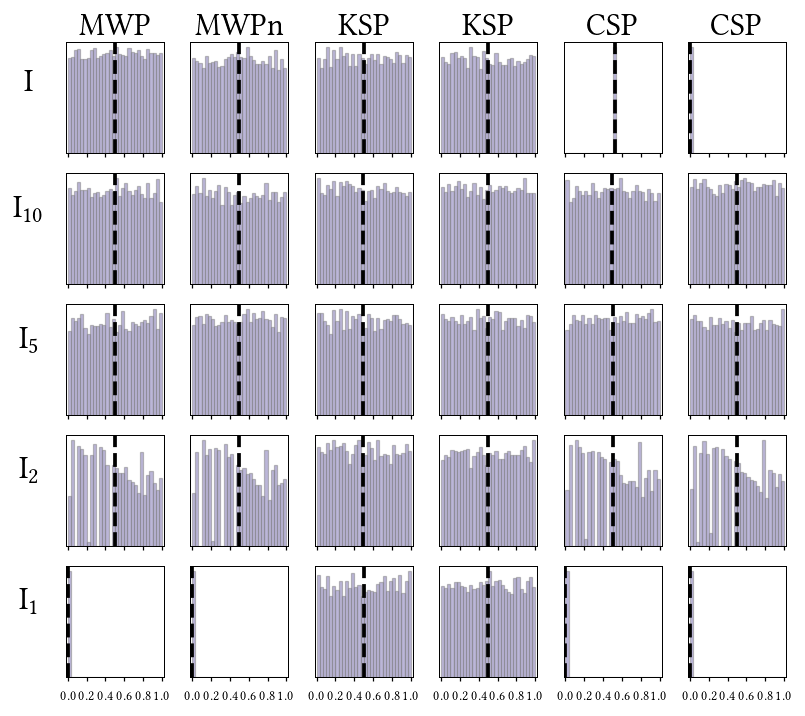

In [11]:
%matplotlib notebook

tests = ["MWP", "MWPn", "KSP", "KSPn", "CSP", "CSPn"]
refIds = ['i-2-0.0-0',
 'i-2-0.0-10',
 'i-2-0.0-5',
 'i-2-0.0-2',
 'i-2-0.0-1']

f, axarr = plt.subplots(len(refIds),len(tests), figsize=(9,8), sharex=True)
axes = axarr.flatten()

i = 0
for refId in refIds: 
    data = masterdata[masterdata["refId"] == refId]
    for test in tests:
        plt.sca(axes[i])
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=purples5[1], alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=3)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], fontsize=11)
        plt.yticks([])
        if(i < len(tests)):
            plt.title(prettynames[test])
        if(i % len(tests) == 0):
            plt.ylabel(prettynames[refId], rotation=0, labelpad=30)
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_I.pdf")

<IPython.core.display.Javascript object>


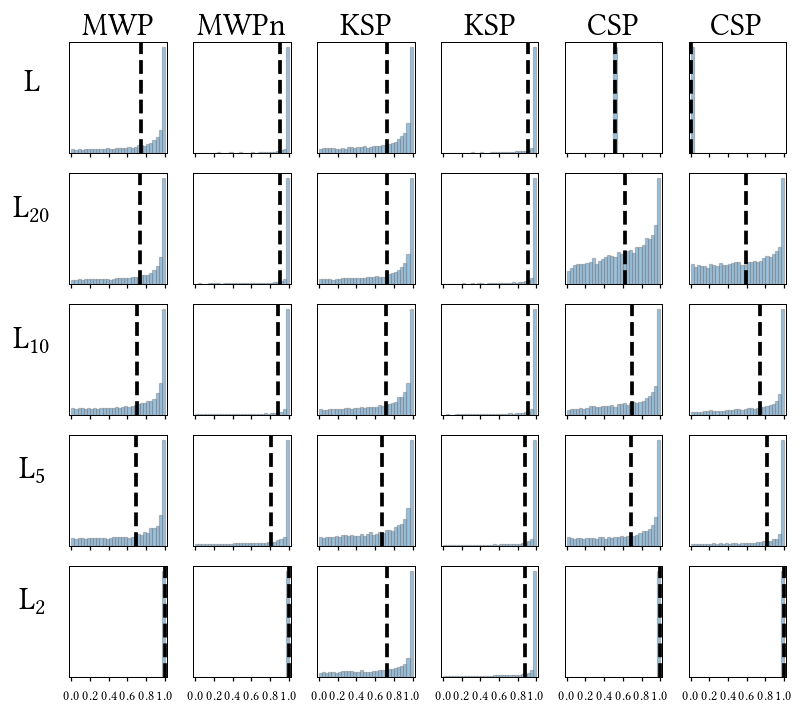

In [12]:
tests = ["MWP", "MWPn", "KSP", "KSPn", "CSP", "CSPn"]
noise = 0.4
refIds = ['l-2-%s-0'%noise,
 'l-2-%s-20'%noise,
 'l-2-%s-10'%noise,
 'l-2-%s-5'%noise,
 'l-2-%s-2'%noise]

f, axarr = plt.subplots(len(refIds),len(tests), figsize=(9,8), sharex=True)
axes = axarr.flatten()

i = 0
for refId in refIds: 
    data = masterdata[masterdata["refId"] == refId]
    for test in tests:
        plt.sca(axes[i])
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=blues5[1], alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=3)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], fontsize=11)
        plt.yticks([])
        if(i < len(tests)):
            plt.title(prettynames[test])
        if(i % len(tests) == 0):
            plt.ylabel(prettynames[refId], rotation=0, labelpad=30)
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_L.pdf")

<IPython.core.display.Javascript object>


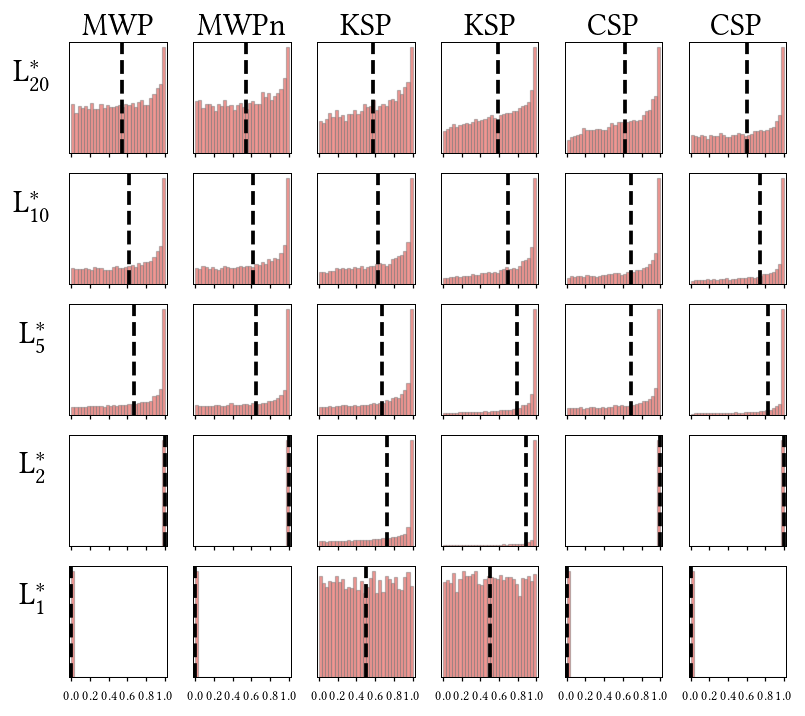

In [13]:
tests = ["MWP", "MWPn", "KSP", "KSPn", "CSP", "CSPn"]
noise = 0.4
refIds = ['lc-2-%s-20'%noise,
 'lc-2-%s-10'%noise,
 'lc-2-%s-5'%noise,
 'lc-2-%s-2'%noise,
 'lc-2-%s-1'%noise]

f, axarr = plt.subplots(len(refIds),len(tests), figsize=(9,8), sharex=True)
axes = axarr.flatten()

i = 0
for refId in refIds: 
    data = masterdata[masterdata["refId"] == refId]
    for test in tests:
        plt.sca(axes[i])
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=reds5[1], alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=3)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], fontsize=11)
        plt.yticks([])
        if(i < len(tests)):
            plt.title(prettynames[test])
        if(i % len(tests) == 0):
            plt.ylabel(prettynames[refId], rotation=0, labelpad=30)
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_Lc.pdf")

<IPython.core.display.Javascript object>


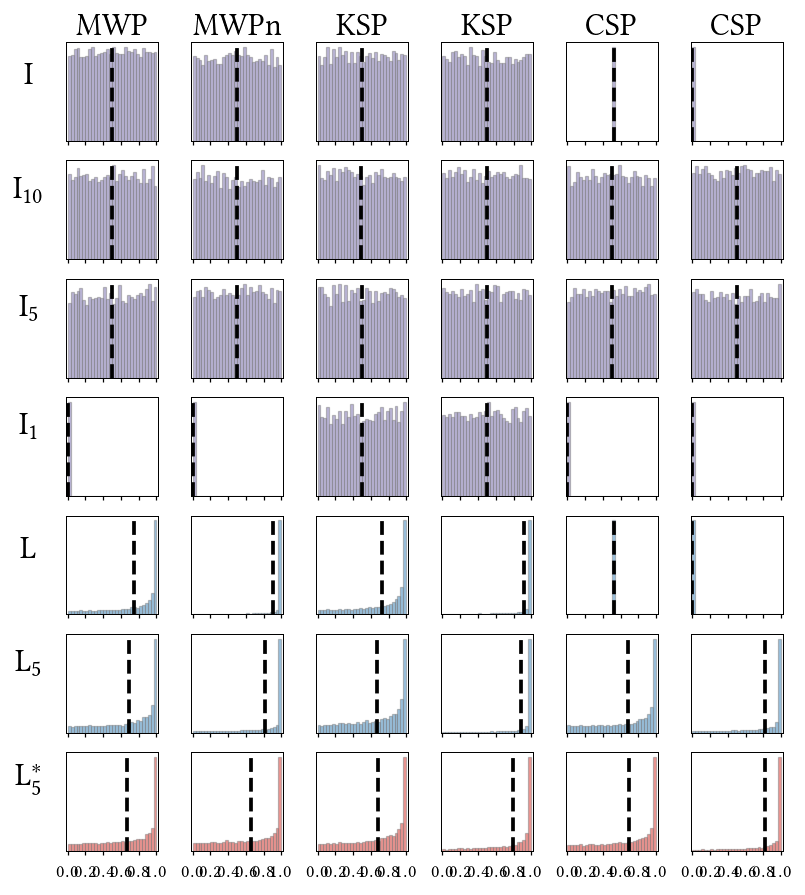

In [14]:
tests = ["MWP", "MWPn", "KSP", "KSPn", "CSP", "CSPn"]
noise = 0.4
refIds = [
 'i-2-0.0-0',
 'i-2-0.0-10',
 'i-2-0.0-5',
 'i-2-0.0-1',
 'l-2-%s-0'%noise,
 'l-2-%s-5'%noise,
 'lc-2-%s-5'%noise]

f, axarr = plt.subplots(len(refIds),len(tests), figsize=(9,10), sharex=True)
axes = axarr.flatten()

i = 0
for refId in refIds: 
    data = masterdata[masterdata["refId"] == refId]
    for test in tests:
        plt.sca(axes[i])
        if(refId.startswith("i")):
            col = purples5[1]
        elif(refId.startswith("lc")):
            col = reds5[1]
        else:
            col = blues5[1]
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=3)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
        plt.yticks([])
        if(i < len(tests)):
            plt.title(prettynames[test])
        if(i % len(tests) == 0):
            plt.ylabel(prettynames[refId], rotation=0, labelpad=30)
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution.pdf")

In [15]:
datacorres = {
    'i-2-0.0-0': "independent-i-2-0.0-gaussian-0",
    'i-2-0.0-10': "independent-i-2-0.0-gaussian-10",
    'i-2-0.0-5': "independent-i-2-0.0-gaussian-5",
    'i-2-0.0-1': "independent-i-2-0.0-gaussian-1",
    'l-2-0.2-0': "linear-l-2-0.2-gaussian-0",
    'l-2-0.2-10': "linear-l-2-0.2-gaussian-10",
    'lc-2-0.2-10': "linearcat-lc-2-0.2-gaussian-10",
    'l-2-0.4-0': "linear-l-2-0.4-gaussian-0",
    'l-2-0.4-10': "linear-l-2-0.4-gaussian-10",
    'lc-2-0.4-10': "linearcat-lc-2-0.4-gaussian-10",
    'l-2-0.4-5': "linear-l-2-0.4-gaussian-5",
    'lc-2-0.4-5': "linearcat-lc-2-0.4-gaussian-5",
    'l-2-0.3-0': "linear-l-2-0.3-gaussian-0",
    'l-2-0.3-10': "linear-l-2-0.3-gaussian-10",
    'lc-2-0.3-10': "linearcat-lc-2-0.3-gaussian-10",
    'l-2-0.3-5': "linear-l-2-0.3-gaussian-5",
    'lc-2-0.3-5': "linearcat-lc-2-0.3-gaussian-5",
    'l-2-0.6-0': "linear-l-2-0.6-gaussian-0",
    'l-2-0.6-10': "linear-l-2-0.6-gaussian-10",
    'lc-2-0.6-10': "linearcat-lc-2-0.6-gaussian-10",
    'l-2-0.6-5': "linear-l-2-0.6-gaussian-5",
    'lc-2-0.6-5': "linearcat-lc-2-0.6-gaussian-5",
}

<IPython.core.display.Javascript object>


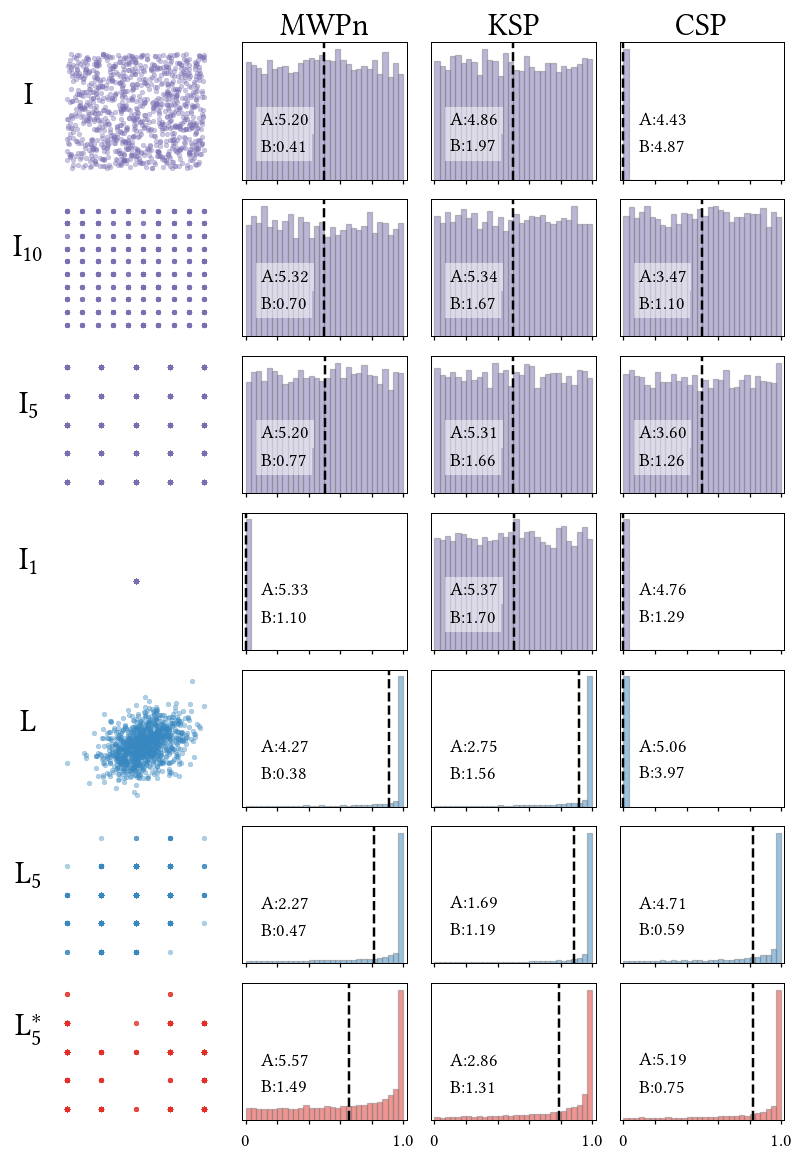

In [16]:
tests = ["MWPn", "KSPn", "CSPn"]
noise = 0.4
refIds = [
 'i-2-0.0-0',
 'i-2-0.0-10',
 'i-2-0.0-5',
 'i-2-0.0-1',
 'l-2-%s-0'%noise,
 'l-2-%s-5'%noise,
 'lc-2-%s-5'%noise]

f, axarr = plt.subplots(len(refIds),len(tests)+1, figsize=(9,13), sharex="col")
axes = axarr.flatten()

i = 0
for refId in refIds:
    if(refId.startswith("i")):
        col = purples5[1]
    elif(refId.startswith("lc")):
        col = reds5[1]
    else:
        col = blues5[1]
            
    plt.sca(axes[i])
    data = masterdata[masterdata["refId"] == refId]
    
    d = pd.read_csv(path_to_results + "data/" + datacorres[refId])
    if(refId != 'i-2-0.0-1'):
        d["1"] = (d["1"]-d["1"].min()) / (d["1"].max()-d["1"].min())
        d["2 "] = (d["2 "]-d["2 "].min()) / (d["2 "].max()-d["2 "].min())
    else:
        d["1"] = d["1"] + 0.5
        d["2 "] = d["2 "] + 0.5
    plt.scatter(d["1"], d["2 "], s=15, alpha=0.4, color=col)
    plt.yticks([])
    plt.xticks([])
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    
    axes[i].spines['bottom'].set_color('white')
    axes[i].spines['top'].set_color('white') 
    axes[i].spines['right'].set_color('white')
    axes[i].spines['left'].set_color('white')
    
    i += 1
    plt.ylabel(prettynames[refId], rotation=0, labelpad=20)
    
    
    for test in tests:
        plt.sca(axes[i])
        
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=2)
        props = dict(facecolor='white', alpha=0.5, edgecolor=None, linewidth=0)
        plt.text(0.1, plt.gca().get_ylim()[1]*4/10, 'A:%.2f' %subdata["prepCPUtime"].mean(), fontsize=15, bbox=props)
        plt.text(0.1, plt.gca().get_ylim()[1]*2/10, 'B:%.2f' %subdata["runCPUtime"].mean(), fontsize=15, bbox=props)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], [0,"","","","",1.0])
        plt.yticks([])
        if(i < 4):
            plt.title(prettynames[test])
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_data_1.pdf")

<IPython.core.display.Javascript object>


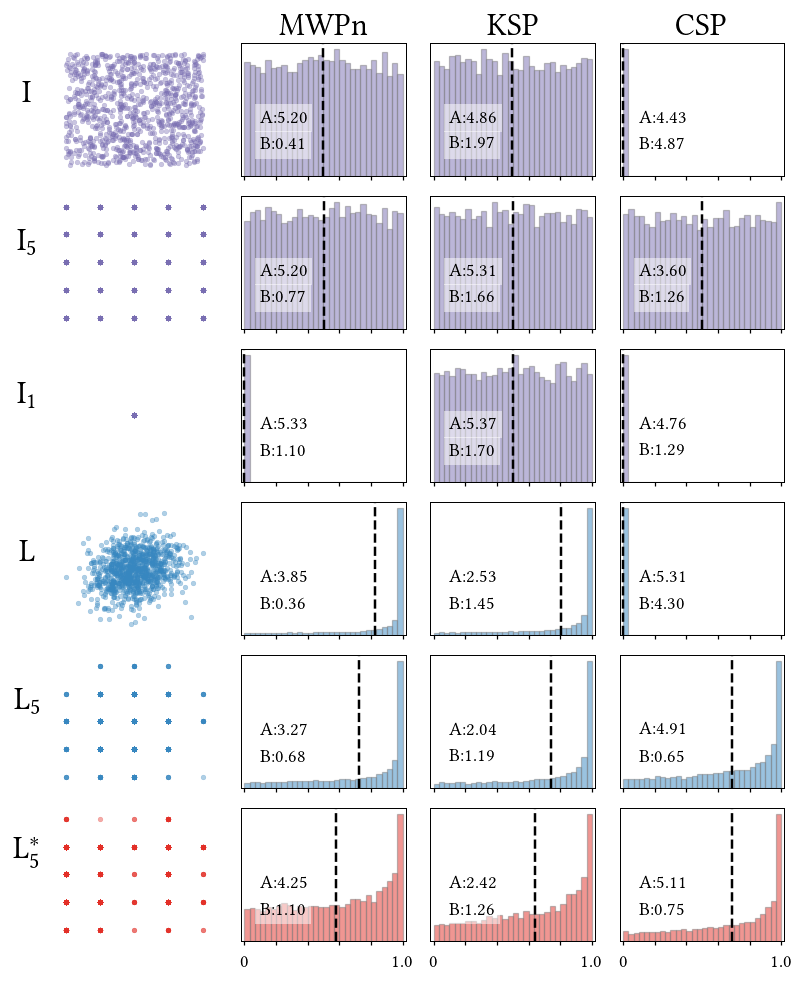

In [17]:
tests = ["MWPn", "KSPn", "CSPn"]
noise = 0.6
refIds = [
 'i-2-0.0-0',
 'i-2-0.0-5',
 'i-2-0.0-1',
 'l-2-%s-0'%noise,
 'l-2-%s-5'%noise,
 'lc-2-%s-5'%noise]

f, axarr = plt.subplots(len(refIds),len(tests)+1, figsize=(9,11), sharex="col")
axes = axarr.flatten()

i = 0
for refId in refIds:
    if(refId.startswith("i")):
        col = purples5[1]
    elif(refId.startswith("lc")):
        col = reds5[1]
    else:
        col = blues5[1]
            
    plt.sca(axes[i])
    data = masterdata[masterdata["refId"] == refId]
    
    d = pd.read_csv(path_to_results + "data/" + datacorres[refId])
    if(refId != 'i-2-0.0-1'):
        d["1"] = (d["1"]-d["1"].min()) / (d["1"].max()-d["1"].min())
        d["2 "] = (d["2 "]-d["2 "].min()) / (d["2 "].max()-d["2 "].min())
    else:
        d["1"] = d["1"] + 0.5
        d["2 "] = d["2 "] + 0.5
    plt.scatter(d["1"], d["2 "], s=15, alpha=0.4, color=col)
    plt.yticks([])
    plt.xticks([])
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    
    axes[i].spines['bottom'].set_color('white')
    axes[i].spines['top'].set_color('white') 
    axes[i].spines['right'].set_color('white')
    axes[i].spines['left'].set_color('white')

    i += 1
    plt.ylabel(prettynames[refId], rotation=0, labelpad=20)
    
    
    for test in tests:
        plt.sca(axes[i])
        
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=2)
        props = dict(facecolor='white', alpha=0.5, edgecolor=None, linewidth=0)
        plt.text(0.1, plt.gca().get_ylim()[1]*4/10, 'A:%.2f' %subdata["prepCPUtime"].mean(), fontsize=15, bbox=props)
        plt.text(0.1, plt.gca().get_ylim()[1]*2/10, 'B:%.2f' %subdata["runCPUtime"].mean(), fontsize=15, bbox=props)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], [0,"","","","",1.0])
        plt.yticks([])
        if(i < 4):
            plt.title(prettynames[test])
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_data_2.pdf")

<IPython.core.display.Javascript object>


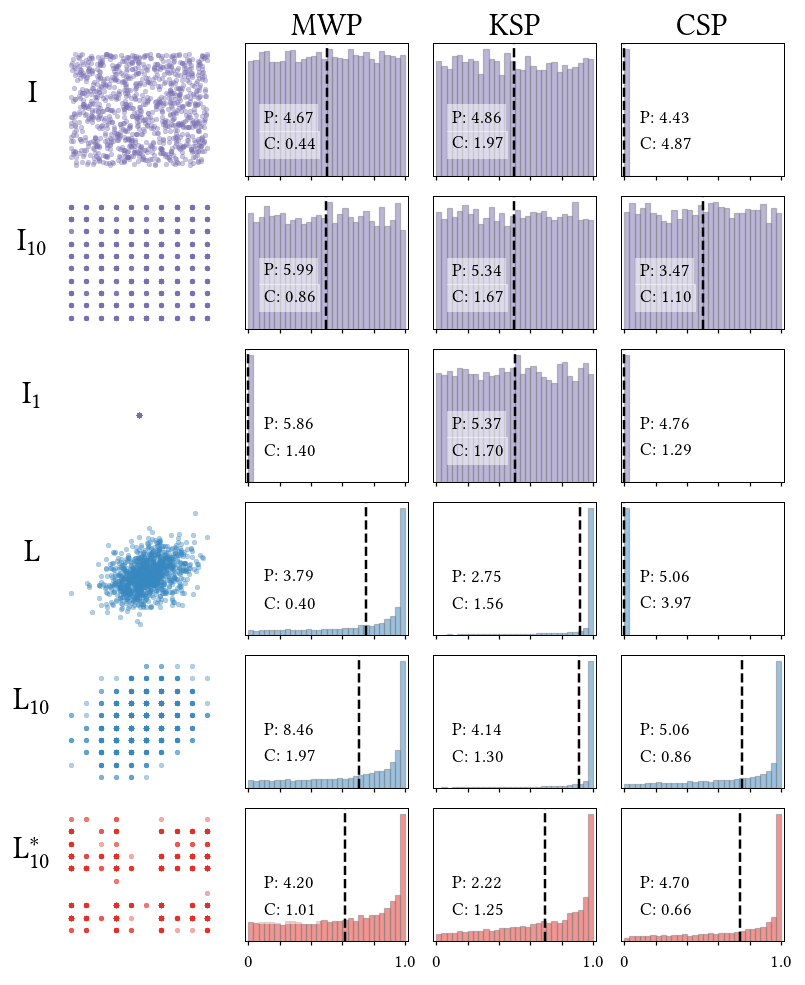

In [18]:
tests = ["MWP", "KSPn", "CSPn"]
noise = 0.4
refIds = [
 'i-2-0.0-0',
 'i-2-0.0-10',
 'i-2-0.0-1',
 'l-2-%s-0'%noise,
 'l-2-%s-10'%noise,
 'lc-2-%s-10'%noise]

f, axarr = plt.subplots(len(refIds),len(tests)+1, figsize=(9,11), sharex="col")#+, sharey=True)
axes = axarr.flatten()

i = 0
for refId in refIds:
    if(refId.startswith("i")):
        col = purples5[1]
    elif(refId.startswith("lc")):
        col = reds5[1]
    else:
        col = blues5[1]
            
    plt.sca(axes[i])
    data = masterdata[masterdata["refId"] == refId]
    
    d = pd.read_csv(path_to_results + "data/" + datacorres[refId])
    if(refId != 'i-2-0.0-1'):
        d["1"] = (d["1"]-d["1"].min()) / (d["1"].max()-d["1"].min())
        d["2 "] = (d["2 "]-d["2 "].min()) / (d["2 "].max()-d["2 "].min())
    else:
        d["1"] = d["1"] + 0.5
        d["2 "] = d["2 "] + 0.5
    plt.scatter(d["1"], d["2 "], s=15, alpha=0.4, color=col)
    plt.yticks([])
    plt.xticks([])
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    
    axes[i].spines['bottom'].set_color('white')
    axes[i].spines['top'].set_color('white') 
    axes[i].spines['right'].set_color('white')
    axes[i].spines['left'].set_color('white')
    
    i += 1
    plt.ylabel(prettynames[refId], rotation=0, labelpad=20)
    
    
    for test in tests:
        plt.sca(axes[i])
        
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=1, edgecolor="grey")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=2)
        props = dict(facecolor='white', alpha=0.5, edgecolor=None, linewidth=0)
        plt.text(0.1, plt.gca().get_ylim()[1]*4/10, 'P: %.2f' %subdata["prepCPUtime"].mean(), fontsize=15, bbox=props)
        plt.text(0.1, plt.gca().get_ylim()[1]*2/10, 'C: %.2f' %subdata["runCPUtime"].mean(), fontsize=15, bbox=props)
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], [0,"","","","",1.0])
        plt.yticks([])
        if(i < 4):
            plt.title(prettynames[test])
        i += 1

plt.tight_layout()
plt.show() 
#plt.savefig("contrast_distribution_data_3.pdf")

## Figure 4: Distribution of the contrast estimation iterations

<IPython.core.display.Javascript object>


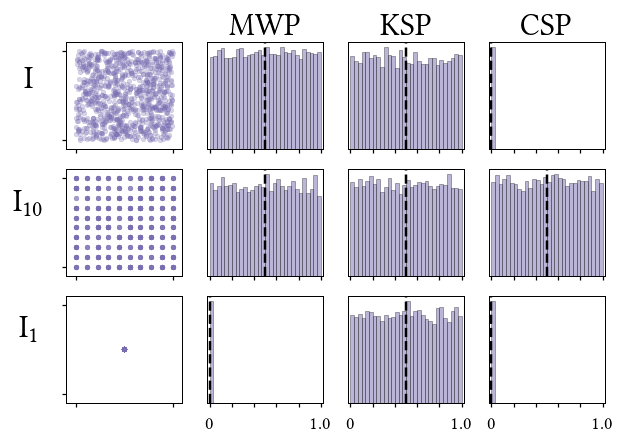

In [19]:
tests = ["MWP", "KSPn", "CSPn"]
noise = 0.4
refIds = [
 'i-2-0.0-0',
 'i-2-0.0-10',
 'i-2-0.0-1']

f, axarr = plt.subplots(len(refIds),len(tests)+1, figsize=(7,5), sharex="col")
axes = axarr.flatten()

i = 0
for refId in refIds:
    if(refId.startswith("i")):
        col = purples5[1]
    elif(refId.startswith("lc")):
        col = reds5[1]
    else:
        col = blues5[1]
            
    plt.sca(axes[i])
    data = masterdata[masterdata["refId"] == refId]
    
    d = pd.read_csv(path_to_results + "data/" + datacorres[refId])
    if(refId != 'i-2-0.0-1'):
        d["1"] = (d["1"]-d["1"].min()) / (d["1"].max()-d["1"].min())
        d["2 "] = (d["2 "]-d["2 "].min()) / (d["2 "].max()-d["2 "].min())
    else:
        d["1"] = d["1"] + 0.5
        d["2 "] = d["2 "] + 0.5
    plt.scatter(d["1"], d["2 "], s=15, alpha=0.3, color=col)
    plt.yticks([0,1], ["", ""])
    plt.xticks([0,1], ["", ""])
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    
    i += 1
    plt.ylabel(prettynames[refId], rotation=0, labelpad=20)
    
    for test in tests:
        plt.sca(axes[i])

        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=0.5, edgecolor="black")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=2)
        
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], [0,"","","","",1.0])
        plt.yticks([])
        if(i < 4):
            plt.title(prettynames[test])
        i += 1

plt.tight_layout()
plt.savefig("plots/Fig4a.pdf")

<IPython.core.display.Javascript object>


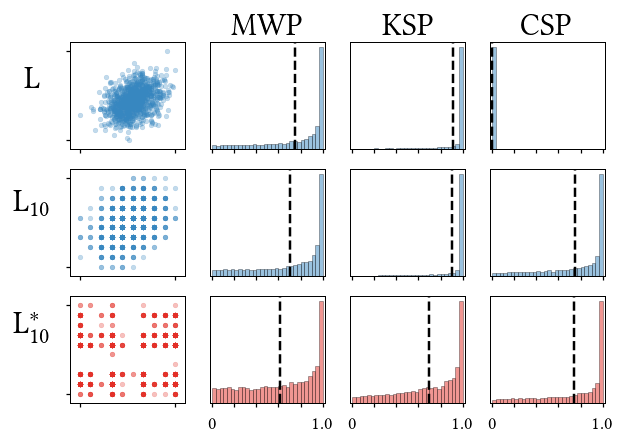

In [20]:
tests = ["MWP", "KSPn", "CSPn"]
noise = 0.4
refIds = [
 'l-2-%s-0'%noise,
 'l-2-%s-10'%noise,
 'lc-2-%s-10'%noise]

f, axarr = plt.subplots(len(refIds),len(tests)+1, figsize=(7,5), sharex="col")
axes = axarr.flatten()

i = 0
for refId in refIds:
    if(refId.startswith("i")):
        col = purples5[1]
    elif(refId.startswith("lc")):
        col = reds5[1]
    else:
        col = blues5[1]
            
    plt.sca(axes[i])
    data = masterdata[masterdata["refId"] == refId]
    
    d = pd.read_csv(path_to_results + "data/" + datacorres[refId])
    if(refId != 'i-2-0.0-1'):
        d["1"] = (d["1"]-d["1"].min()) / (d["1"].max()-d["1"].min())
        d["2 "] = (d["2 "]-d["2 "].min()) / (d["2 "].max()-d["2 "].min())
    else:
        d["1"] = d["1"] + 0.5
        d["2 "] = d["2 "] + 0.5
    plt.scatter(d["1"], d["2 "], s=15, alpha=0.3, color=col)
    plt.yticks([0,1], ["", ""])
    plt.xticks([0,1], ["", ""])
    plt.xlim((-0.1, 1.1))
    plt.ylim((-0.1, 1.1))
    
    i += 1
    plt.ylabel(prettynames[refId], rotation=0, labelpad=20)
    
    for test in tests:
        plt.sca(axes[i])
        
        subdata = data[data["testId"] == test]
        plt.hist(subdata["contrast"], bins=30, range=(0,1), normed=True, 
                 color=col, alpha=0.5, linewidth=0.5, edgecolor="black")
        plt.axvline(subdata["contrast"].mean(), c="black", linestyle="--", linewidth=2)
        
        plt.xlim((-0.02,1.02))
        plt.xticks([0,0.2,0.4,0.6,0.8,1.0], [0,"","","","",1.0])
        plt.yticks([])
        if(i < 4):
            plt.title(prettynames[test])
        i += 1

plt.tight_layout()
plt.savefig("plots/Fig4b.pdf")